In [6]:
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:',np.__version__)

Pandas: 2.2.3
Numpy: 2.0.2


Business Understanding:
    
The Adult "Census Income" Dataset, donated on 4/30/1996, includes 48,482 instances and 14 features. The features are both numerical and categorical. The data was extracted from the 1994 cencus database to help predict if an adult's annual income exceeds 50k$ per year. The dataset was selected from the census to include individuals over 16 who work at least one day per week, make over 100 USD per year, and are weighted properly to ensure that it is a meaningful entry. 

Because the nature of this lab was to identify a classification task from a dataset with 3 or more classes to predict, instead of using this data to predict if an adults annual income exceeds 50k$/year (binary classification task), we will be using it to predict a persons level of education (Education Num variable). There are 16 classes in this feature.

Being able to predict a person's education level could be extremely useful for product recommendations by companies that offer a large variety of products. A person's education level influences the products that a person is likely to buy and the media that a person is likely to click on. Large companies, like Netflix and Amazon could use this program to more accurately suggest products/media that the consumer would be more likely enjoy. For example, if a person is predicted to have a high education level, Netflix could suggest more documentaries or intellectual material (or whatever type of media they find that people with that specific education level enjoy based on their analysis). 

This model would likley be used for offline analysis. The companies could run an analysis using the data that they have on their customers one time, and use then continually use these results. 

In order for this model to useful, it would only have to be about 85% accurate. The data and its applications are not of a very sensitive nature. The business application that we envision for this model also has relatively low stakes, because it is not dealing with sensitive/critical fields, like medical data . The worst case scenero is that people get an ad for a product that doesn't apply to them, or get a show suggested for them that does not appeal to their demographic. 

There is a study published in 2023 (linked below) that discusses a machine learning model used to tailor advertisements to users, which is extremely similar to my use case that i discuss here. To train and develop their model, they used 7.2K images facial images, as well as associated information about the people like gender, class, and age. 

This model looks at person's face, predicts their age and gender, then outputs recommended products with 87.5% accuracy (recommending relevant products to 7/8 test subjects). The products that they were recommending to users were very generic, like shoe, purse, hoodie, etc. There is also a very small real world testing sample size.

Their model is similar to my envisioned use for this model. However, while their model uses face images as input, mine uses much more detailed demographic data like income, career, marriage, class, etc, which  cannot be extracted from an image of a person's face alone and allows complex patterns to be identified. The predictions made using these patterns allow us to produce nuanced outputs, in this case, about a person's education level. 

The added complexity of my model would allow us to make much more refined reccommendations than the model discussed in the study, like specific brands/styles of products. However, it's increased complexity, as opposed to their  wide generalization tasks, may result in decreased accuracy. Despite the potential lower accuracy, the study proves that even small improvements in recommendation personalization significantly improve user satisfaction. Because of this, my model would still be very effective for my business case, even with an accuracy slightly lower than 87.5% 

https://ieeexplore.ieee.org/document/10256332

kiersten wener 
Data set: https://archive.ics.uci.edu/dataset/2/adult



In [7]:
#import the data, label the columns 
col_names = ('Age', 'Work Class', 'Fnlwgt', 'Education', 'Education Num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Income')
df = pd.read_csv('adult.data', header = None, names = col_names)
df = df.drop(0)
df = df.reset_index(drop=True)
df.head()


,Age,Work Class,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
#replace the string income values with ints 0 and 1 
df.replace({'Income': {' >50K': 1, ' <=50K': 0}}, inplace=True)
#replace all missing values with nan to be able to find missing values more easily 
df.replace(' ?', np.nan, inplace=True)
df.head()

/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/218440465.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Income': {' >50K': 1, ' <=50K': 0}}, inplace=True)


,Age,Work Class,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Work Class      30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education Num   32560 non-null  int64 
 5   Marital Status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital Gain    32560 non-null  int64 
 11  Capital Loss    32560 non-null  int64 
 12  Hours Per Week  32560 non-null  int64 
 13  Native Country  31977 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Education and Education number are highly correlated; Education num is just the numerical value associated with Education. In order to avoid one hot encoding and simplify the resulting dataframe, remove the education column. 

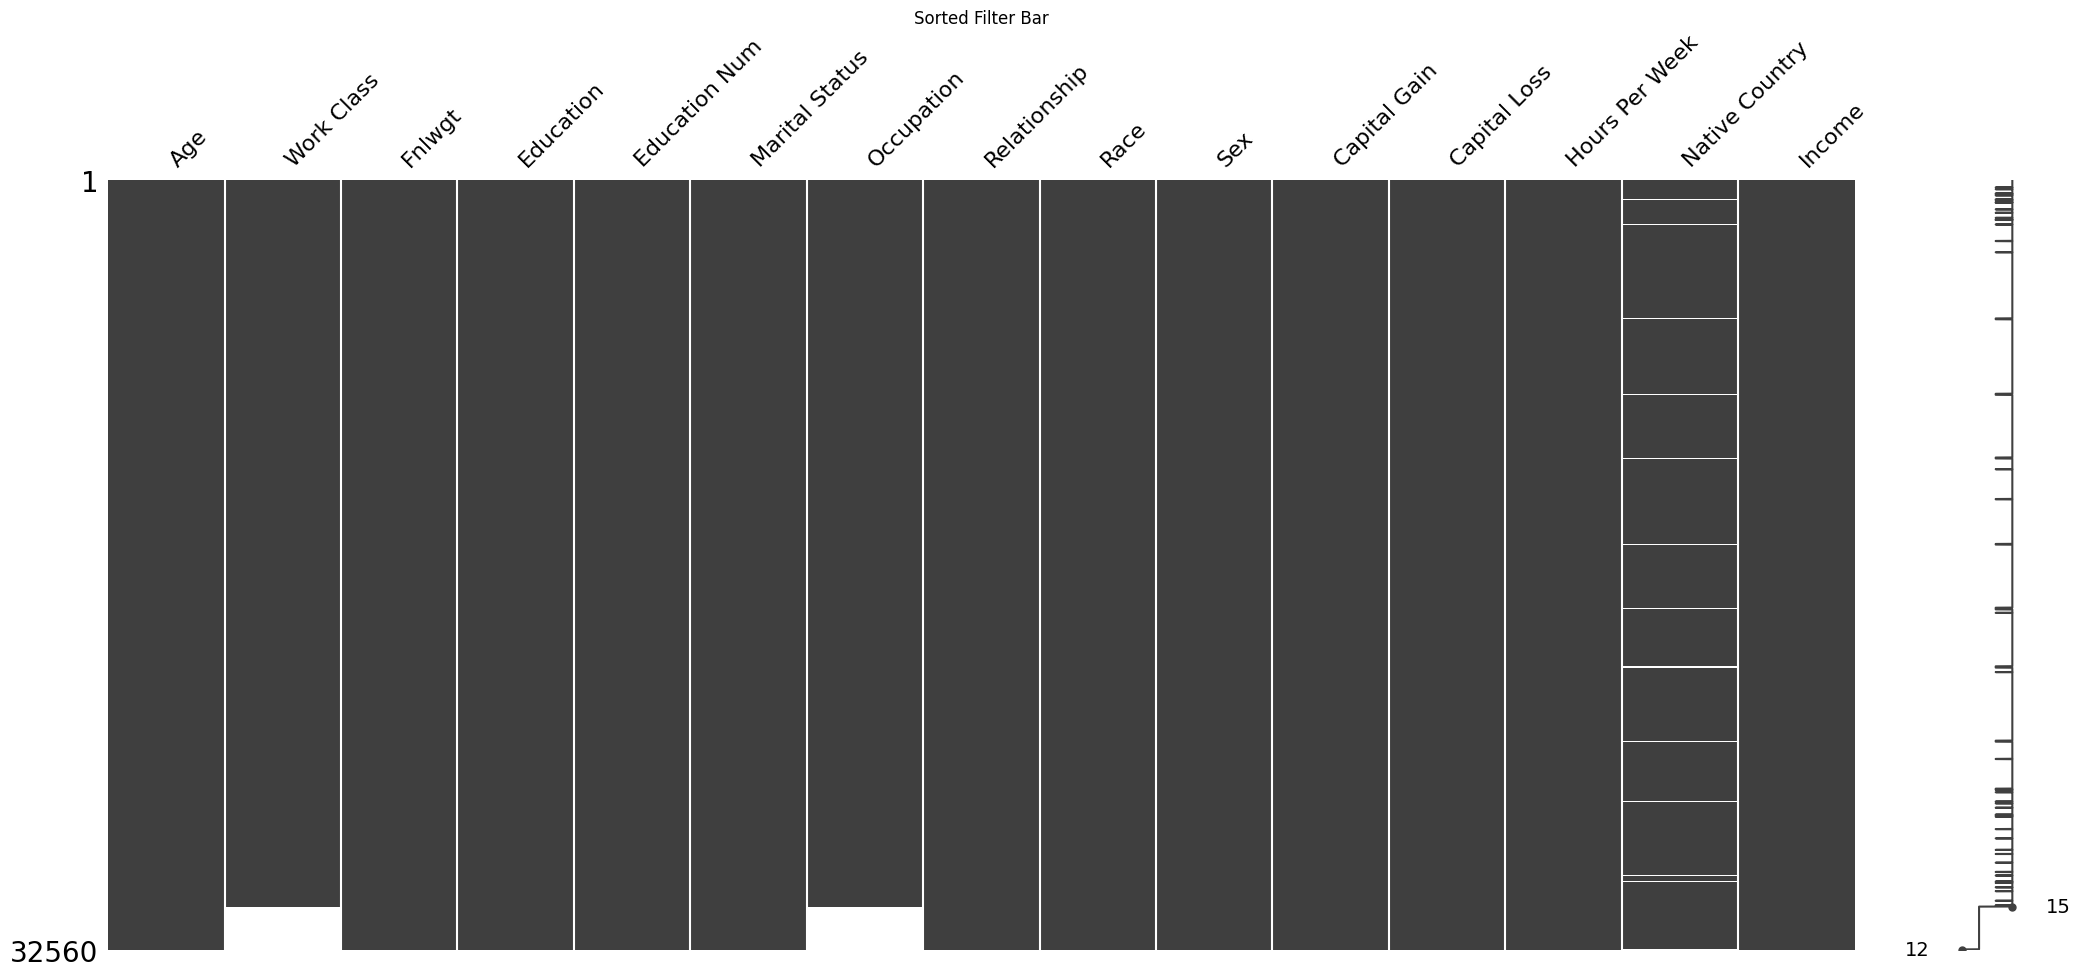

In [11]:
#from data visualization github presentation
import matplotlib.pyplot as plt 
import missingno as mn
mn.matrix(df.sort_values(by = ['Work Class', 'Occupation', 'Native Country']))
plt.title('Sorted Filter Bar')
plt.show()

Graph and analysis taken from our lab 1

The similar size and location of the white area on Work Class and Occupation bars indicate that those two attributes have missing data in the same rows for these columns. It could be inferred that there is a correlation between the missing values in these columns.

The evenly spaced white lines in the Native Country bar indicate that the missing values for Native country are spread relatively evenly throughout the data set, with no correlation with the missing values for the other two attributes

Since this data set was collected from the census, we have concluded that the correlation between the missing values in the Work Class and Occupation attributes can be explained by people who's occupations were not accurately described by any of the occupation categories available on the census. According to Census.gov, census data is collected though surveys where people fill out questions about their occupation, which is then coded to fit into categories. If a person's answers about their occupation arent able to be correctly categorized into an occupation, they would not be able to be categorized into a work class either, leaving both attributes blank. 


We have decided to eliminate the rows that are missing data. Becasue the dataset is so large and the number of rows missing data is relatively small, this should not have large impact on distributions of the attributes.  All of the rows that are misisng Work Class are also missing Occupation. This speaks to the strong correlation between the two attributes. No other attribute in the table has a meaningful enough correlation with either Occupation or Work class to act as an accurate predictor for the misisng values. 


If only one of these attributes was missing, we may be able to impute the values using the present attribute in combination other related attributes, like sex, gender, or education. However, since both Occupation and Work Class are missing, this approach may not produce accurate results. 

This also applies to the Native Country attribute. Only a small portion of the data set is missing that attribute and it would be very difficult to impute with any degree of accuracy because no other attributes in the data set are strong predictors of Native Country. 

In [12]:
df = df.dropna()

In [13]:
#from chat gpt
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
numeric_features = ['Age', 'Fnlwgt', 'Hours Per Week', 'Capital Gain', 'Capital Loss']  # Include relevant numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])


fnlwgt is a weighting class that is not necessary; it represents how much of the true poplation that sameple represents, which isnt helpful in classification or prediction

In [14]:
df.drop(columns=['Fnlwgt'], inplace=True)

In [15]:
df.drop(columns=['Education'], inplace=True)
df.info()
df_not_encoded = df


<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30161 non-null  float64
 1   Work Class      30161 non-null  object 
 2   Education Num   30161 non-null  int64  
 3   Marital Status  30161 non-null  object 
 4   Occupation      30161 non-null  object 
 5   Relationship    30161 non-null  object 
 6   Race            30161 non-null  object 
 7   Sex             30161 non-null  object 
 8   Capital Gain    30161 non-null  float64
 9   Capital Loss    30161 non-null  float64
 10  Hours Per Week  30161 non-null  float64
 11  Native Country  30161 non-null  object 
 12  Income          30161 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.2+ MB


In [16]:
#From class githib lecture 2a
df= pd.concat([
    pd.get_dummies(df, columns = ['Work Class', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native Country'])], axis=1)
df.head()

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week,Income,Work Class_ Federal-gov,Work Class_ Local-gov,Work Class_ Private,Work Class_ Self-emp-inc,...,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
0,0.880275,13,-0.147437,-0.21859,-2.331495,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,-0.033338,9,-0.147437,-0.21859,-0.077735,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,1.108678,7,-0.147437,-0.21859,-0.077735,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.794682,13,-0.147437,-0.21859,-0.077735,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.109472,14,-0.147437,-0.21859,-0.077735,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30161 entries, 0 to 32559
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         30161 non-null  float64
 1   Education Num                               30161 non-null  int64  
 2   Capital Gain                                30161 non-null  float64
 3   Capital Loss                                30161 non-null  float64
 4   Hours Per Week                              30161 non-null  float64
 5   Income                                      30161 non-null  int64  
 6   Work Class_ Federal-gov                     30161 non-null  bool   
 7   Work Class_ Local-gov                       30161 non-null  bool   
 8   Work Class_ Private                         30161 non-null  bool   
 9   Work Class_ Self-emp-inc                    30161 non-null  bool   
 10  Work Class_ Sel


Each of the categorical features-- previously Work Class, Martial Status, Occupation, Relationship, Race, Sex, and Native Country--was turned from an object to binary value using one hot encoding. For example, for each tuple, work class could be classified as Federal-gov, Local-gov, Private, Self-emp-inc, Self-emp-not-inc, State-goc, or Without Pay. One hot encoding turns each of these classifications into a column on the table, putting a 0 for all of the ..., and a 1 in the column that represents the category that the tuple belongs in. 
After one hot encoding, there are 88 features instead of the previous 13 features. 


Because the Education Num and Education attributes represented the same thing, I dropped the Education categorical variable for simplicity. Education Num provides the same amount of information, if not more, about the education level of a person. The high correlation between the two variables could also mess up the prediction task of guessing Education num. 

I dropped Fnlwgt because it is just a  weighting factor that represents how much of the true population that this tuple is said to represent. It has no benefit for this classification tasks. 

As explained above, we dropped the rows with missing attributes.

In order for the logistic regression to be done later, we scaled the Age and Hours per week attributes. 

In [18]:
df_not_encoded.describe()

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week,Income
count,3.016100e+04,30161.000000,3.016100e+04,3.016100e+04,3.016100e+04,30161.000000
mean,1.116665e-16,10.121216,-1.083683e-17,3.887124e-17,1.646727e-16,0.248931
std,1.000017e+00,2.549983,1.000017e+00,1.000017e+00,1.000017e+00,0.432401
min,-1.632161e+00,1.000000,-1.474374e-01,-2.185898e-01,-3.333166e+00,0.000000
25%,-7.946822e-01,9.000000,-1.474374e-01,-2.185898e-01,-7.773541e-02,0.000000
50%,-1.094724e-01,10.000000,-1.474374e-01,-2.185898e-01,-7.773541e-02,0.000000
75%,6.518717e-01,13.000000,-1.474374e-01,-2.185898e-01,3.396275e-01,0.000000
max,3.925652e+00,16.000000,1.335437e+01,1.055564e+01,4.847146e+00,1.000000


In [19]:
#one hot distribution help from chatgpt

hot_occupation = [col for col in df.columns if 'Occupation_' in col]
hot_marital = [col for col in df.columns if 'Status_' in col]
hot_class = [col for col in df.columns if 'Class_' in col]
hot_relationship = [col for col in df.columns if 'Relationship_' in col]
hot_race = [col for col in df.columns if 'Race_' in col]
hot_sex = [col for col in df.columns if 'Sex_' in col]
hot_country = [col for col in df.columns if 'Country_' in col]

hot_occupation_count = df[hot_occupation].sum().sort_values(ascending=False)
hot_marital_count = df[hot_marital].sum().sort_values(ascending=False)
hot_class_count= df[hot_class].sum().sort_values(ascending=False)
hot_relationship_count = df[hot_relationship].sum().sort_values(ascending=False)
hot_race_count = df[hot_race].sum().sort_values(ascending=False)
hot_sex_count = df[hot_sex].sum().sort_values(ascending=False)
hot_country_count  = df[hot_country].sum().sort_values(ascending=False)





/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/3211824721.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, ax=axes[i], palette='viridis')
/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/3211824721.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.index, y=count_data.values, ax=axes[i], palette='viridis')
/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/3211824721.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_data.ind

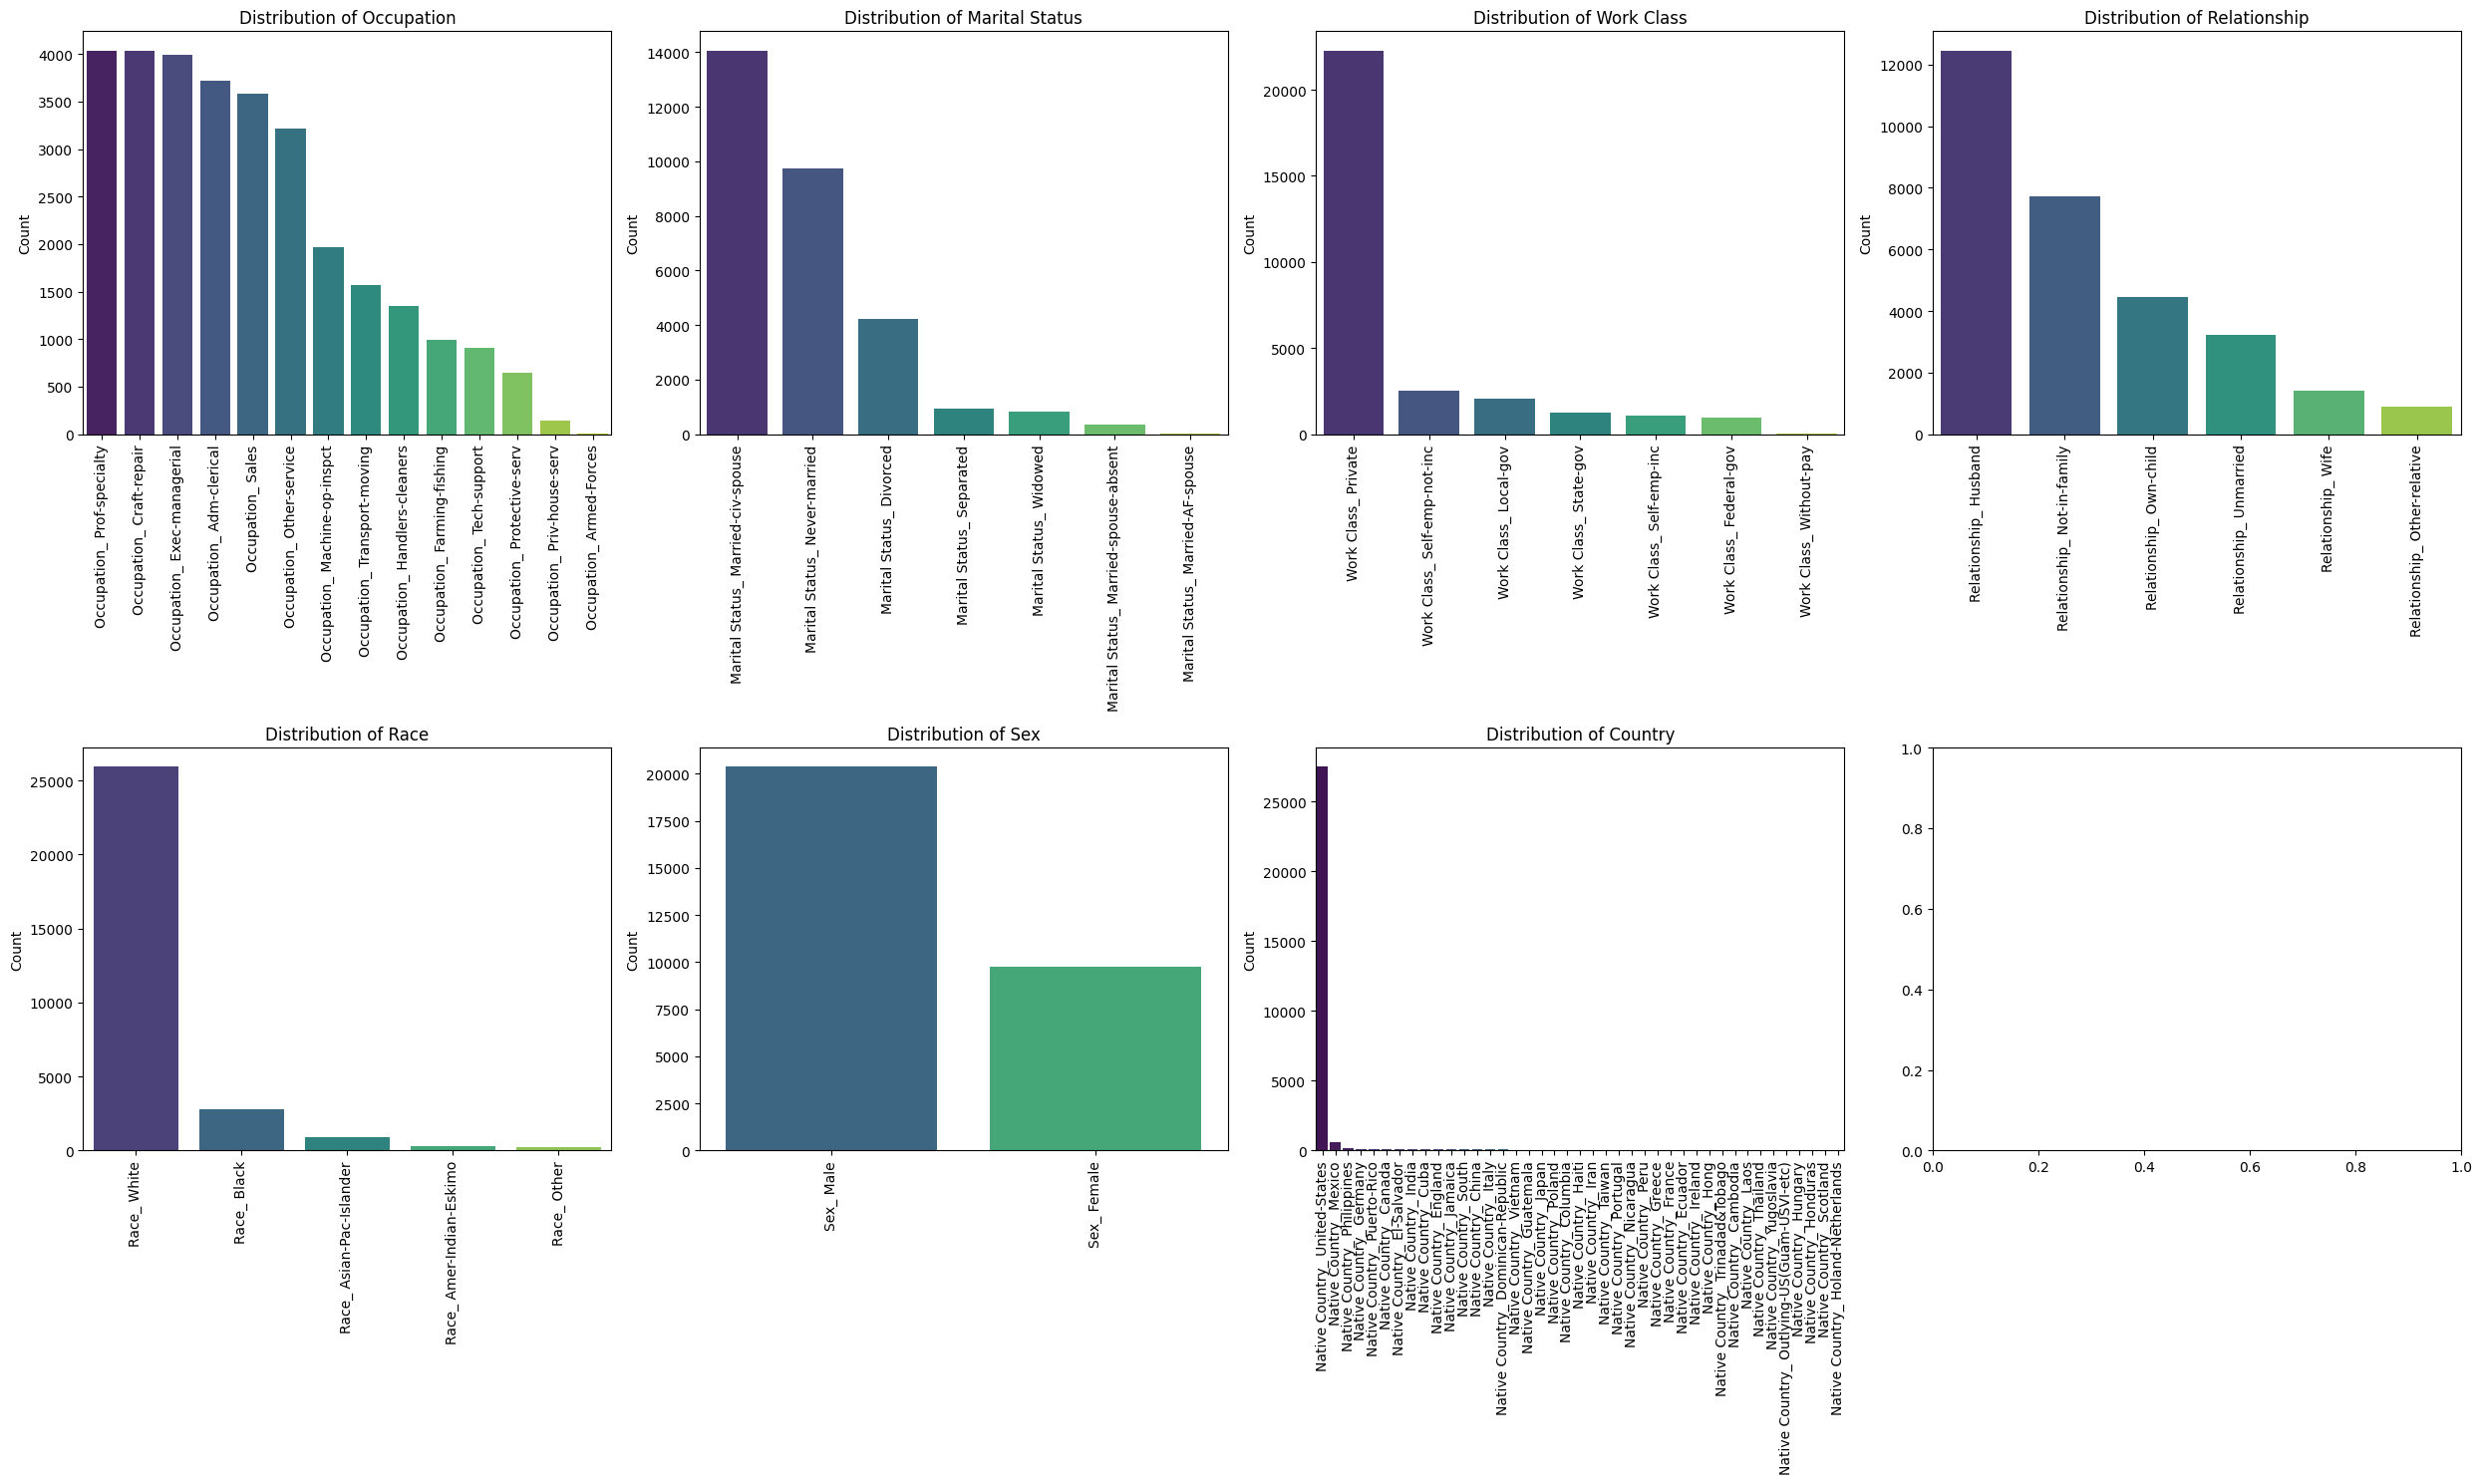

In [20]:
import seaborn as sns
one_hot_summaries = [
    ('Occupation', hot_occupation_count),
    ('Marital Status', hot_marital_count),
    ('Work Class', hot_class_count),
    ('Relationship', hot_relationship_count),
    ('Race', hot_race_count),
    ('Sex', hot_sex_count),
    ('Country', hot_country_count)
]

# Define the number of rows and columns for the grid
rows = 2
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(25, 15))  # Adjust figsize to fit the plots
axes = axes.flatten()  # Flatten the axes array to make it easier to loop through

# Loop through each category and plot it on its respective axis
for i, (title, count_data) in enumerate(one_hot_summaries):
    sns.barplot(x=count_data.index, y=count_data.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {title}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

These graphs show the distributions among the classes for all of the catgorical varaibles that were encoded using one hot encoding.

The graphs are relatively self explanitory: We see that the majority of tuples in the data set contain married white men from the united states, with an occupation classified under professioanl/speciality in the private work class. All of the distributions are skewed, which tells us that all of the classes in the true population are not being accurately represented. The statistics and predictions of classes of people in less represented groups are more likely to be incorrect than those in the groups that are more represented in the data. 

Ignore the blank chart in the corner, there is an off number of encoded categorical variables. 

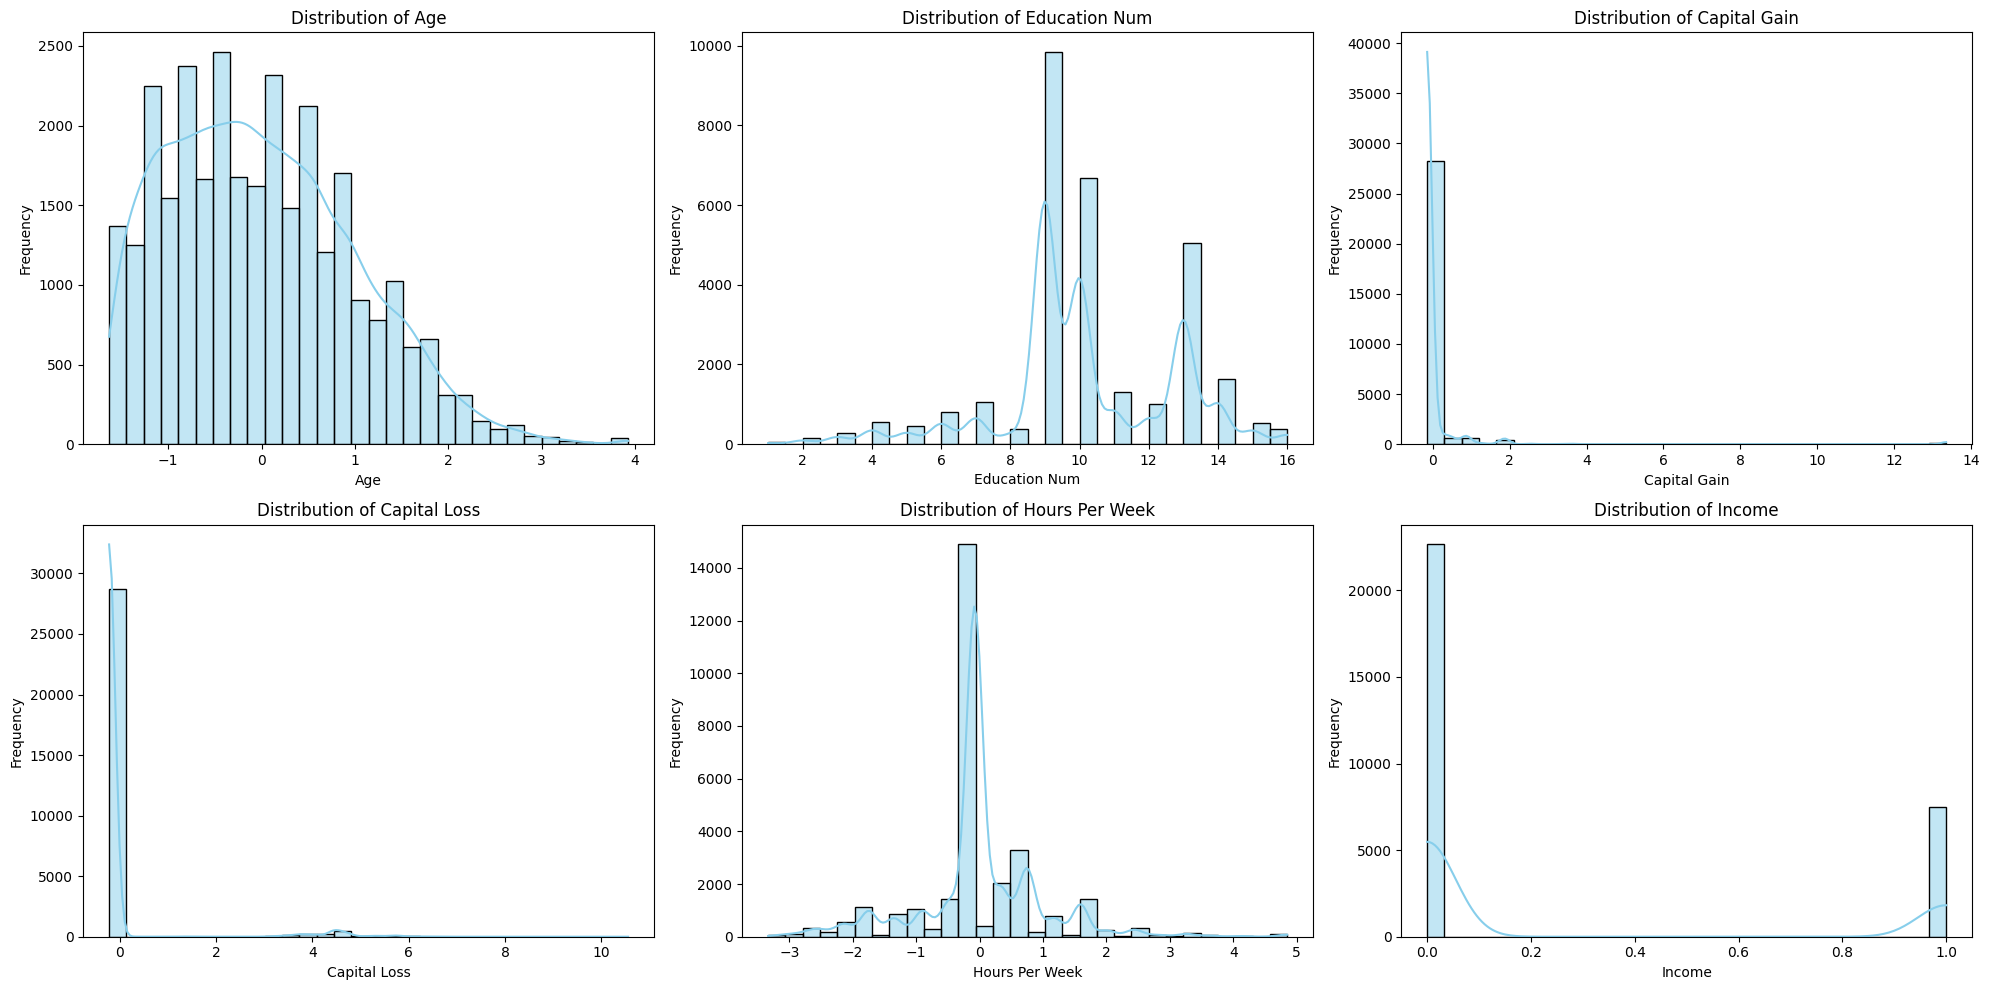

In [21]:
#refernces from chatgpt for formatting of the graphs 

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns 
rows = 2
cols = (len(numeric_columns) + 1) // rows 
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array to make it easier to loop through

# Loop through each numeric column and plot its distribution
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axes[i], bins=30, kde=True, color='skyblue')  # Histogram with KDE
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots (if applicable)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Removes any extra empty subplots

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

After the standardization of the numeric values , (except for education num because this attribute is more accurately described by a ordinal, nominal variable, instead of a numeric one), we can tell that none of the numeric features are normally distributed. They are all unmodal, meaning that a large quantity of samples in the data are identified by the same class of a specified feature. The features that are closest to normal are Age( it is relatively centered around a mean of 0, but it is right skewed), and Hours per week (it is also pretty closely centered around 0, and less skew than age). 

In [22]:
#we are predicting the education num
from sklearn.model_selection import ShuffleSplit

X = df.drop('Education Num', axis = 1)
X = X.to_numpy()
y = df['Education Num'].to_numpy()

X = X.astype(float)  
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(
                         n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         


Modeling
(all code from noted exceot for changes specified in the lab instructions)

In [89]:
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_intercept(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_intercept=True):
        # add bias term if requested
        Xb = self._add_intercept(X) if add_intercept else X
      
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    

In [90]:
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'


    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[0]
        else:
            return None

        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_intercept=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        
        Xb = self._add_intercept(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features))
      
       # init weight vector to zeros
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [91]:
class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, solver = 'Gradient', C = 1.0, reg = "None"):
        self.eta = eta
        self.iters = iterations
        self.solver = solver

        self.C = C
        self.reg = reg
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
       
        ydiff = y-self.predict_proba(X,add_intercept=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through

        gradient = gradient.reshape(self.w_.shape)

        if(self.reg == 'L2'): 
            gradient[1:] += -2 * self.w_[1:] * self.C

        elif (self.reg == 'L1'):
            gradient[1:] += np.sign(self.w_[1:]) * self.C

        elif (self.reg == 'Both'):
            l1_penalty = np.sign(self.w_[1:]) * self.C
            l2_penalty = -2 * self.w_[1:] * self.C

    # Adjust gradient with both penalties
            gradient[1:] += l1_penalty + l2_penalty       
        
        return gradient
  


In [92]:
class LogisticRegression:
    def __init__(self, eta, iterations=20, solver = 'Gradient', C = 1.0, regularization = "None"):
        self.eta = eta
        self.iters = iterations
        self.solver = solver

        self.C = C
        self.regularization = regularization
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    @property
    def coef_(self):
        if(hasattr(self,'w_')):
            return self.w_[:,1:]
        else:
            return None

    @property
    def intercept_(self):
        if(hasattr(self,'w_')):
            return self.w_[:,0]
        else:
            return None
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        if self.solver == 'Gradient':
            for i,yval in enumerate(self.unique_): # for each unique value
                y_binary = (y==yval) # create a binary problem
                # train the binary classifier for this class
                blr = VectorBinaryLogisticRegression(self.eta,
                                                    self.iters, C = self.C, reg = self.regularization)
                blr.fit(X,y_binary)
                
                # add the trained classifier to the list
                self.classifiers_.append(blr)
                
            # save all the weights into one matrix, separate column for each class
            self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

        if self.solver == 'SLR':
            for i,yval in enumerate(self.unique_): # for each unique value
                    y_binary = (y==yval) # create a binary problem
                    # train the binary classifier for this class
                    blr = StochasticLogisticRegression(self.eta,
                                                        self.iters, C = self.C, reg = self.regularization)
                    blr.fit(X,y_binary)
                    # add the trained classifier to the list
                    self.classifiers_.append(blr)
               

        if self.solver == "Newtons":
            for i,yval in enumerate(self.unique_): # for each unique value
                y_binary = (y==yval) # create a binary problem
                # train the binary classifier for this class
                blr = HessianBinaryLogisticRegression(self.eta, C = self.C, reg = self.regularization, iterations = self.iters)
                blr.fit(X,y_binary)
                # add the trained classifier to the list
                self.classifiers_.append(blr)
                    
                # save all the weights into one matrix, separate column for each class
            self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        return np.column_stack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

In [93]:
class StochasticLogisticRegression(BinaryLogisticRegression):
    # stochastic gradient calculation 
    def __init__(self, eta, iterations=20, C=1.0, reg='none'):
        self.eta = eta
        self.iters = iterations
        self.C = C 
        self.reg = reg


    def _get_gradient(self,X,y):
      
        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)
        
    
    

        X_batch = X[idxs]
        y_batch = y[idxs]
        
        ydiff = y_batch-self.predict_proba(X_batch, add_intercept=False).ravel() # get y difference (now scalar)
    
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        #this is for L2 regularization, need to account for other types 
        if(self.reg == 'L2'): 
            gradient[1:] += -2 * self.w_[1:] * self.C

        elif (self.reg == 'L1'):
            gradient[1:] += np.sign(self.w_[1:]) * self.C

        elif (self.reg == 'Both'):
            l1_penalty = np.sign(self.w_[1:]) * self.C
            l2_penalty = -2 * self.w_[1:] * self.C

    # Adjust gradient with both penalties
            gradient[1:] += l1_penalty + l2_penalty

        
        return gradient
    
    

In [94]:
from numpy.linalg import pinv

class HessianBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, eta, iterations=20, C=1.0, reg='none'):
        self.eta = eta
        self.iters = iterations
        self.C = C 
        self.reg = reg

    # just overwrite gradient function
    def _get_gradient(self,X,y):
        g = self.predict_proba(X,add_intercept=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        #this is also for L2 regularization, need to account for other types
        gradient = pinv(hessian) @ gradient


        if(self.reg == 'L2'): 
            gradient[1:] += -2 * self.w_[1:] * self.C

        elif (self.reg == 'L1'):
            gradient[1:] += np.sign(self.w_[1:]) * self.C

        elif (self.reg == 'Both'):
            l1_penalty = np.sign(self.w_[1:]) * self.C
            l2_penalty = -2 * self.w_[1:] * self.C

    # Adjust gradient with both penalties
            gradient[1:] += l1_penalty + l2_penalty         
        return gradient

I believe that an 80/20 split works for my data, but it could be simpler to use a smaller training set. The dataset is so large that using 80% of it is training is excessive and not necessary. 
Also, splitting the data randomly, 80/20, might be risky because of the unequal distributions of the data. There are some classes that make up the majority of the dataset, meaning it is posisble that during the split, others are grossly misrepresented in the training set. This would lead to increased error in the test set. Lets quantify this. 




Updated after further analysis: Because the data set is so large, with the 80/20 split, running the model with Newtons method (the most accurate one), takes a really long time. Later in the code, i began to use a smaller training set for time sake. 

See what combination of SLR, steepest ascent, and all of the regularization is the most accurate

In [43]:
from sklearn import metrics as mt
regTerms = ['L1', 'L2', 'Both', 'None']
opt = ['Gradient', 'SLR']

best = None
highestAcc = -np.inf
params = []
accs = []
for i in range(len(opt)):
    for j in range(len(regTerms)):
        fold_accuracies = []
        test3 = LogisticRegression(eta = 1.0,  C = .05, solver = opt[i], regularization= regTerms[j])
        print(f'{i} and {j} loop')
        iter_num=0
        meanacc = 0
        # the indices are the rows used for training and testing in each iteration
        for train_indices, test_indices in cv_object.split(X,y): 
            # I will create new variables here so that it is more obvious what 
            # the code is doing (you can compact this syntax and avoid duplicating memory,
            # but it makes this code less readable)
            X_train3 = X[train_indices]
            y_train3 = y[train_indices]
            X_test3 = X[test_indices]
            y_test3 = y[test_indices]
            
            # train the reusable logisitc regression model on the training data
            test3.fit(X_train3,y_train3)  # train object
            y_hat3 = test3.predict(X_test3) # get test set precitions

            acc3 = mt.accuracy_score(y_test3,y_hat3)
            fold_accuracies.append(acc3)
            meanacc += acc3
            iter_num += 1
        
        meanacc /= iter_num

        accs.append(fold_accuracies)
        params.append(f"{opt[i]}-{regTerms[j]}")


        if meanacc > highestAcc:
            highestAcc = meanacc
            best = {opt[i], regTerms[j]}





print(f'Best combo of optimization tecnique and regulation terms is {best} with an accuracy of {highestAcc}')

0 and 0 loop
0 and 1 loop
0 and 2 loop
0 and 3 loop
1 and 0 loop
1 and 1 loop
1 and 2 loop
1 and 3 loop
Best combo of optimization tecnique and regulation terms is {'None', 'Gradient'} with an accuracy of 0.38935852809547483


In [73]:
for acc in accs:
    print(max(acc))

0.34808552958727
0.34858279462953756
0.34228410409414883
0.3983092988562904
0.3164263218962374
0.3514006298690535
0.34012928891098954
0.33996353389690037


Model with steepest gradient and no regularization has highest max accuracy across all folds and models at .40 as well as the highest average accuracy across folds at .39.

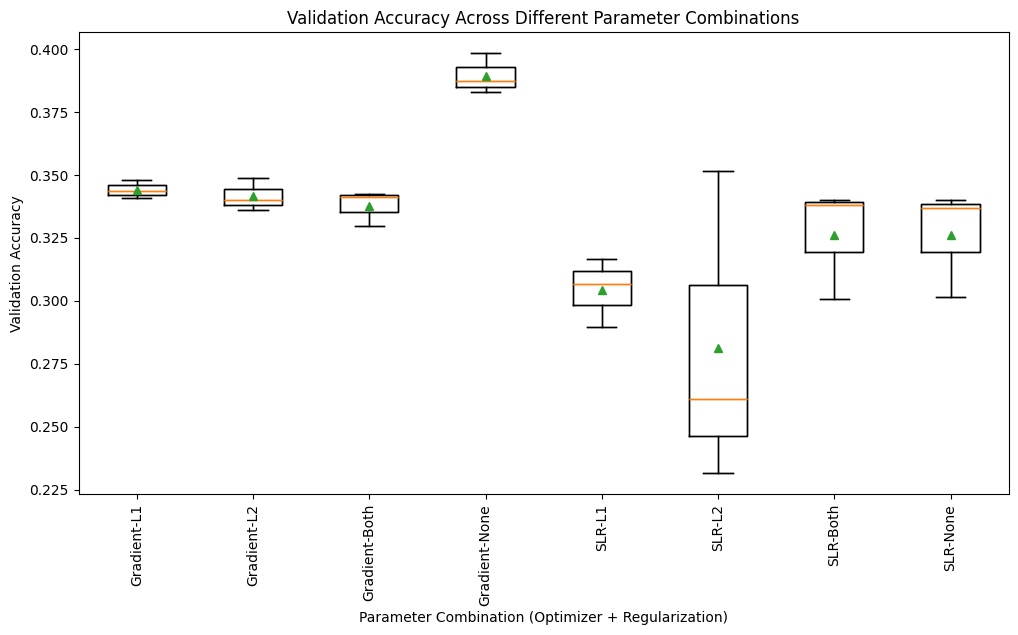

In [46]:
plt.figure(figsize=(12, 6))
plt.boxplot(accs)
plt.boxplot(accs, showmeans=True)
plt.xticks(range(1, len(accs) + 1), params, rotation='vertical')
plt.xlabel('Parameter Combination (Optimizer + Regularization)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across Different Parameter Combinations')
plt.show()

In this box plot, we are able to see a comparison of the accuracies across paramater combinations. 

In these box plots, the orange line symbolizes the median value, which is the 50th percentile of the data (which divides the datapoints into two equal halves). The further the median line is away from the center of the box, the more skewed the distibution of the data is. The green triangle symbolizes the mean, or the average accuracy across the three folds for each parameter combination. The top of the box represents the 75th percentile of the data while the lower box line represents the 25th percentile of the data across the folds. The shorter the box is (the closer the 25th and 75th percentile of the data are to eachother), the more concentrated the data is around the median. Longer lines coming from each side of the box indicate a larger range of values in the dataset, which means there is less consistency in the validation accuracy of the model. 

We see here from box plot for the model using steepest gradient and no regularization that that model has the highest mean accuracy, the highest median accuracy, a relatively short box (implying that the data is closely distributed around the median), and short lines extending from it. The short box and short lines imply that the validation accuracies are relatively consistent across the folds. Even though there are only a small number of folds, this tells us that the performance of that model is consistent on different data sets, which is a positive indicator for its performance.

On the other hand, we see almost opposite traits in the box plot for the SLR model with L2 regularization. The box is long, which symbolizes a wide variation in the accuracy data points, and therefor not very consistent performance across different data sets. The median and mean accuracies of this model are also the lowest, which allows us to infer that it has the worst performance based on the data points gathered. 

This analysis would be more reliable if the models were tested across more folds, giving us more data points and therrefor a better idea of the true distribution of accuracies. However, since the box plots for steepest gradient no reg and SLR-LR are significantly different than the others, it is safe to assume that those are the best and worst performing models, respectively.

I will do statistical testing below to confirm these observations. 

In [65]:
from scipy.stats import kruskal

accs_none_grad = accs[3]  # List of accuracies for 'None' regularization
accs_l1_grad = accs[0]    # List of accuracies for 'L1' regularization
accs_l2_grad = accs[1]    # List of accuracies for 'L2' regularization
accs_both_grad = accs[2]

accs_none_slr = accs[7]  # List of accuracies for 'None' regularization
accs_l1_slr= accs[4]    # List of accuracies for 'L1' regularization
accs_l2_slr = accs[5]    # List of accuracies for 'L2' regularization
accs_both_slr = accs[6]

stat1, p_value1 = kruskal(accs_none_grad, accs_l1_grad, accs_l2_grad, accs_both_grad, accs_none_slr, accs_l1_slr, accs_l2_slr, accs_both_slr)

print(f"Kruskal-Wallis test statistic: {stat1}")
print(f"P-value: {p_value1}")

# Interpretation
if p_value1 < 0.1:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis test statistic: 13.655937364071356
P-value: 0.05765035504334512
There is a statistically significant difference between the groups.


Becasue the pvalue of .058 is lower than the significance value of .1, the test tells that there is least one statistically different pair of validation accuracies. 

Because of the results of this statistical test, i will continue with my assumption that stochastic gradient descent with no regularization had the best accuracy score of the models we have looked at so far. 

Here, i increased the significance score from .05 to .1 in order to support my assertion that one of the models has a higher accuracy than the others. By increasing the significance level, i am increasing the probability that i will have a Type 1 error (incorrectly rejecting the null hypothesis that there is no statistically significant pair). I increased the chance from 5% to 10%, which means that we have less confidence in our results. 

This can contributes to data snooping, because i am tailoring my analysis to confirm a pre existing assumption (that steepest gradient descent without regularization has best result).

However, even if this test gave me a very high p-value, or a strong sign that there is not a statistically significant difference, I would still need to pick a model with highest accuracy to continue with the assignment, so increasing the p-value doesnt exactly make a difference in the overall outcome.

But, note that the accuracies across all of the models tested are pretty similar. 

Now look at the results using newton's. Based on  prior research and running of the models, i suspect that one of the models using newtons will yield the highest accuracies 

In [104]:
accs_newt = []
highestAcc = -float('inf')
params_newt = []

for j in range(len(regTerms)):
    fold_accuracies_newt = []
    test3 = LogisticRegression(eta = 1.0,  C = .05, solver = 'Newtons', regularization= regTerms[j], iterations= 4)
    print(f'{j} loop')
    iter_num=0
    meanacc = 0
    # the indices are the rows used for training and testing in each iteration
    for train_indices, test_indices in cv_object.split(X,y): 
        # I will create new variables here so that it is more obvious what 
        # the code is doing (you can compact this syntax and avoid duplicating memory,
        # but it makes this code less readable)
        X_train3 = X[train_indices]
        y_train3 = y[train_indices]
        X_test3 = X[test_indices]
        y_test3 = y[test_indices]
        
        # train the reusable logisitc regression model on the training data
        test3.fit(X_train3,y_train3)  # train object
        y_hat3 = test3.predict(X_test3) # get test set precitions

        acc3 = mt.accuracy_score(y_test3,y_hat3)
        fold_accuracies_newt.append(acc3)
        meanacc += acc3
        iter_num += 1

    meanacc /= iter_num

    accs_newt.append(fold_accuracies_newt)
    params_newt.append(f"{regTerms[j]}")


    if meanacc > highestAcc:
        highestAcc = meanacc
        best = regTerms[j]

print(f'Best combo of optimization tecnique and regulation terms is Newtons and {best} with an accuracy of {highestAcc}')

0 loop
1 loop
2 loop
3 loop
Best combo of optimization tecnique and regulation terms is Newtons and Both with an accuracy of 0.4118825011604005


In [107]:
for accs in accs_newt:
    print(max(accs))

0.4150255288110868
0.41389828260725414
0.4165506266162721
0.41190902460049067


We see from the code above that Newtons with both regularization types (l1 and l2) has the highest average accuracy (across folds) with 41.2%. I will now analyze the boxplots like i did with the parameter combinations above. 

The max accuracy for all combinations across all cross validation folds for models using Newton's is .417, again, when are both regularization tecniques. 


This allows me to form an initial hypothesis that the model using Newton's optimization and both regularization tecniques has the highest accuracy. 



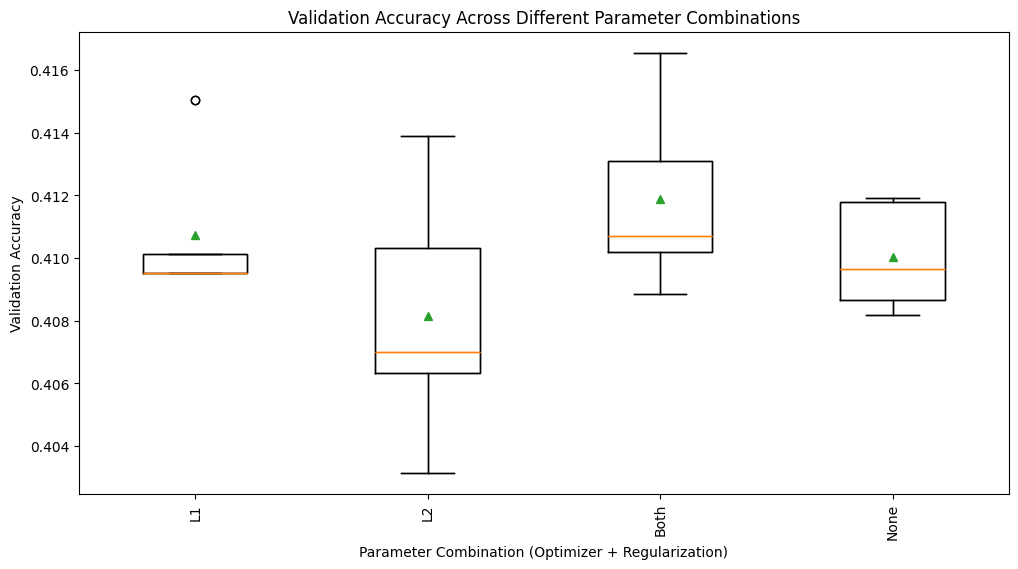

In [108]:
plt.figure(figsize=(12, 6))
plt.boxplot(accs_newt)
plt.boxplot(accs_newt, showmeans=True)
plt.xticks(range(1, len(accs_newt) + 1), regTerms, rotation='vertical')
plt.xlabel('Parameter Combination (Optimizer + Regularization)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Across Different Parameter Combinations')
plt.show()


Here, we see that the model with the highest median and mean accuracy is the model with both regularizations. This supports the hypothesis of its superiority made above.

We also see that the median value for all of the models are towards the bottom border of the box, which indicates that most of the validation accuracies (across folds) cluster towards the lower/middle range of the data collected. We are also able to conclude by the small spread (small box size, comparatively), that all of the models produce pretty consistent validation accuracies across different data sets. This is ideal! 




In [110]:
from scipy.stats import kruskal

accs_newt_none = accs_newt[3]  # List of accuracies for 'None' regularization
accs_newt_l1 = accs_newt[0]    # List of accuracies for 'L1' regularization
accs_newt_l2 = accs_newt[1]    # List of accuracies for 'L2' regularization
accs_newt_both = accs_newt[2]

stat, p_value = kruskal(accs_newt_none, accs_newt_l1, accs_newt_l2, accs_newt_both)

print(f"Kruskal-Wallis test statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis test statistic: 2.9861236802413216
P-value: 0.3937695835906303
There is no statistically significant difference between the groups.


The statistical test has negated the observation that i made above about newtons with both regularizations providing better results than the other regularizations. There is no statistically significant difference between the mean accuracies of models using Newtons with different regularizations. This means that it is possible that the version of the model with both regularizations has the highest mean accuracy just by chance and that the results could differ if the models were run again on different data. I will do another statistical test below that compares the mean accuracies across all of models tested (newtons, steepest ascent,stochastic gradient ascent ). 

Again, me ignoring the blatent lack of a statistically significant difference in avg accuracy is data snooping, because i am choosing to form a conclusion that lacks statistical validity. However, like i said before,  i still have to pick a model that has the best performance, and since there is no statistically significant difference, I might as well just pick the model with the highest mean and highest max accuracy across folds.

However, I am aware that the regularization tecnique does not make that much of a difference on the accuracy results while using newtons. 

In [102]:
stat_all, p_value_all = kruskal(accs_newt_none, accs_newt_l1, accs_newt_l2, accs_newt_both, accs_none_grad, accs_l1_grad, accs_l2_grad, accs_both_grad, accs_none_slr, accs_l1_slr, accs_l2_slr, accs_both_slr)

print(f"Kruskal-Wallis test statistic: {stat_all}")
print(f"P-value: {p_value_all}")

# Interpretation
if p_value_all < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")

Kruskal-Wallis test statistic: 36.207527488018
P-value: 0.00015629936435938608
There is a statistically significant difference between the groups.


This statistical test asserts that between all of the combinations of optimization and regulatization tecniques, there is a statistically significant difference between at least one pair of model accuracies. 

This is helpful because we can be sure (with 5% confidence) that at least one model is better than at least one other model. I will operate under the assumption that is is the model with netwons and both regularizations, even though we cannot be positive of this based on the data. 

This supports my claim that the model with Newtons optimization and both regularization tecniques has the highest accuracy. The claim is also supported by the observation that its box plot shows the highest median and the smallest spread across all of the box plots, which implies a good performance, comparatively. 



Explore different C values for newtons with both regularization

In [109]:

%%time

# alternatively, we can also graph out the values using boxplots
num_cv_iterations = 5
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.5)

def lr_explor(cost):
    lr_clf = LogisticRegression(eta = 1,  C = float(cost), solver = 'Newtons', regularization= 'Both', iterations= 4)
    acc = []
    for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X, y)):
        print(f'run {iter_num}')
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        
        # Train and predict
        lr_clf.fit(X_train, y_train)
        y_hat = lr_clf.predict(X_test)

        acc.append(mt.accuracy_score(y_test, y_hat))
        
    return np.array(acc)
    
costs = [1.0, .5, .05, .01]
accs_c = []
for c in costs:
    accs_c.append(lr_explor(c))

run 0


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 1


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 2


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 3


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 4


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 0


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 1


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 2
run 3


/var/folders/mr/sl6z67x90cnd3byx1_6t2cyh0000gn/T/ipykernel_26881/1412815263.py:17: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-theta))


run 4
run 0
run 1
run 2
run 3
run 4
run 0
run 1
run 2
run 3
run 4
CPU times: user 17min 42s, sys: 7min 22s, total: 25min 4s
Wall time: 31min 22s


In [111]:
mean_accs = [np.mean(acc) for acc in accs_c]

# Find the cost that gives the highest mean accuracy
best_cost = costs[np.argmax(mean_accs)]
highest_accuracy = max(mean_accs)


print(f"Best cost: {best_cost} with accuracy: {highest_accuracy}")  

Best cost: 0.05 with accuracy: 0.41591406405410786


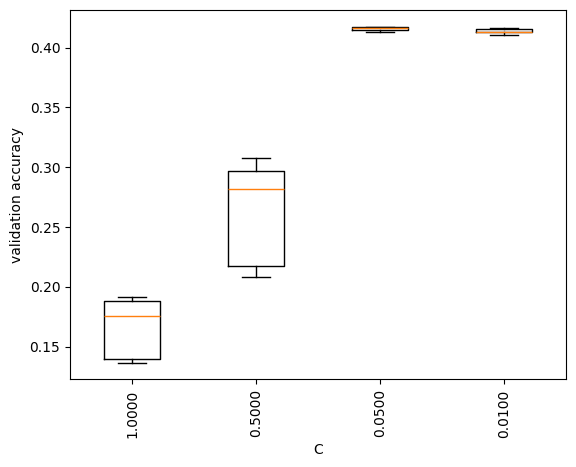

In [112]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.boxplot(accs_c)
plt.xticks(range(1,len(costs)+1),['%.4f'%(c) for c in costs],rotation='vertical')
plt.xlabel('C')
plt.ylabel('validation accuracy')
plt.show()

https://www.kaggle.com/code/usman8/logistic-regression-tuning-the-c-parameter
https://learn.codesignal.com/preview/lessons/760/hyperparameter-tuning-in-logistic-regressions

Here, we visualize the results of using Newtons with no regularization on a box plot. They provide insight into how distribution of accuracies across folds varies for different C values.

We are looking at the model that uses newtons and both regularization tecniques. C plays an important role in regularization by affecting  how aggressively the model updates weights during optimization. High C values make the model more sensitive to noise and overfitting because it forces the model to fit the data closely. In simple terms, a high C value is telling you model to take all of the details very seriously to try to match the training data as closely as possible. Low C values, on the other hand, focus on conservative weight updates, which could lead to underfitting. 

We see here that the ranges of accuracies for the models with C = 1 and C = .5 are much larger than than ranges of accuracies for the other two models with smaller C values. This tells us that there is a more inconsistent performance in those models. This variation may be because the large values of C are causing overfitting, like i said before. They may be fitting to noise in the data instead of the actual meaningful patterns, which would explain this inconsistency. 

The models with the lower C values have a significantly smaller spread, to the point where it looks like all of the data points across folds are right on top of eachother when just looking at the graph. This tells us that the performnce of these models is very consistent and reliable, no matter the subset of the data that it is being tested on. This is ideal!

From above, we know the cost with the highest accuracy is .05, with the accurcy .42. The strong performance of this model is also shown by the very small spread of the data and the pretty equal distribution of the data around the mean.



In [114]:
#maybe get rid

from scipy.stats import kruskal

accs_c1 = accs_c[0]  # List of accuracies for 'None' regularization
accs_c2= accs_c[1]    # List of accuracies for 'L1' regularization
accs_c3 = accs_c[2]    # List of accuracies for 'L2' regularization
accs_c4 = accs_c[3]

stat_c, p_valuec = kruskal(accs_c1, accs_c2, accs_c3, accs_c4)

print(f"Kruskal-Wallis test statistic: {stat_c}")
print(f"P-value: {p_valuec}")

# Interpretation
if p_valuec < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")





Kruskal-Wallis test statistic: 16.714285714285708
P-value: 0.0008090896181674359
There is a statistically significant difference between the groups.


There is a very obvious statistically significant difference between at least two of the groups. This is supprotive of the claim i made in the past section!

However, it is important to note that based on this analysis and the box plot, it is possible that  C = .05 only yielded better mean accuracy by chance, and that in reality C = .01 has better performance. 

Moving on, I am going to use C = .05 as the basis for my analysis bevause when i ran the model, it had the highest avg  val accuracy across folds. 

In [116]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# how do we compare now to sklearn?
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size=0.2)
lr_sk = LogisticRegression(solver='lbfgs',n_jobs=1,
                           multi_class='ovr', C = 1/0.001, 
                           penalty='l2',
                          max_iter=100) # all params default
# note that sklearn is optimized for using the liblinear library with logistic regression
# ...and its faster than our implementation here

lr_sk.fit(X_train, y_train) # no need to add bias term, sklearn does it internally!!
print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

/Users/kierstenwener/Desktop/MLLab7/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/kierstenwener/Desktop/MLLab7/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 0.71930261  0.29694907  0.09424131 ... -2.24592666 -0.43282386
  -0.03068274]
 [ 0.79058801 -0.78949783  0.07697149 ... -2.13726933  1.61826901
  -0.16959019]
 [ 0.6905213  -0.15801636  0.19038262 ... -1.82089807 -0.30365289
  -0.14458794]
 ...
 [ 0.322058   -0.01962928  0.03644392 ... -0.01143464 -2.27490703
  -0.91175824]
 [ 0.2460866   0.13896544  0.06658644 ...  0.29707851 -0.62398281
  -0.05724911]
 [ 0.61089073  0.01144058  0.07107671 ... -0.78896531  0.6496336
  -0.12913828]]
Accuracy of:  0.4114039449693353
CPU times: user 847 ms, sys: 19.8 ms, total: 867 ms
Wall time: 876 ms


According to the analysis above, the accuracy of the sklearn model is .41, which is less than the accuracy of my best custom model, which is .42 (rounded). Even though the difference is small, it demonstrates that my custom model may have a slight advantage to the sklearn one. 

However, my model takes significantly longer to run because the sklearn model is designed to be very computationally efficient. 

However, in my business case, I discussed that the companies would run the model once, and then use the reults in their continued analysis. Becuase the model is not being continuously run, in the grand scheme of things, the runtime of the model is not that important and does not need to be a detrimental factor in choosing the sklearn model over mine. 

one advantage of my model is that it is highly customizable and allows complete control over the optimization process, which could come in handy in the future. For example, a company could have certain constraints that needed to be addressed and my model would allow them to ... while the sklearn one would be more difficult. 

On the other a scikit learn has been optimized for its scalability and is extremely reliable, which could be useful for a large corporation with an huge dataset. It also is extremely well documented, with the website providing extensive help for issues. 

